In [5]:
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt

chosen_game = 2

results_file_names = ['pnd_2022-04-15.csv', 'pnd50_2022-04-15.csv', 'pnd100_2022-04-15.csv', 'pnd_random_2022-04-15.csv', 'pnd50_2_2022-04-15.csv']
operations_file_names = ['operations-15.04-15h59m.csv', 'operations-15.04-16h13m.csv', 'operations-15.04-16h27m.csv', 'operations-15.04-16h33m.csv', 'operations-15.04-16h43m.csv']


features0 = ['participant.id_in_session', 'participant.label', 'participant.payoff']
geninfo = pd.read_csv('survey_end_2022-04-15.csv')[features0]

#features = ['participant.id_in_session', 'participant.label', 'participant.payoff', 'player.q_strat', \
#            'player.q_st_other', 'player.q_st_rate', 'player.q_other']
features = ['player.payoff', 'player.money', 'player.is_participate', 'player.cu1_quantity', 'player.cu2_quantity', \
            'player.cu3_quantity', 'subsession.update_number', 'subsession.manip_update', 'subsession.seed']
pnd = pd.read_csv(results_file_names[chosen_game-1])[features]

features = ['participant.label', 'participant.id_in_session', 'participant.payoff', 'player.is_participate', \
            'player.payoff', 'player.money', 'player.cu1_quantity', 'player.cu2_quantity', \
            'player.cu3_quantity', 'subsession.update_number', 'subsession.manip_update', 'subsession.seed']
pnd = pd.concat([geninfo, pnd], axis=1)[features]
pnd

,participant.label,participant.id_in_session,participant.payoff,player.is_participate,player.payoff,player.money,player.cu1_quantity,player.cu2_quantity,player.cu3_quantity,subsession.update_number,subsession.manip_update,subsession.seed
0,Тюрин Артем,1,7076.0,0,2594.0,0.000000,31.062899,29.174375,4.577835,96,81,1650038708
1,Галкин Никита,2,3981.0,1,2525.0,0.000000,224.974977,0.000000,0.000000,96,81,1650038708
2,Курдюкова Нина,3,-1112.0,0,420.0,5269.969085,49.426691,10.049019,4.806251,96,81,1650038708
3,Голодков Александр,4,2134.0,1,2877.0,4041.514444,151.227353,0.000000,3.418367,96,81,1650038708
4,Кожогулов Нурсултан,5,-3178.0,0,-1763.0,13244.267914,0.000000,0.000000,4.620202,96,81,1650038708
5,Р,6,-3356.0,1,-240.0,0.000000,197.353914,0.000000,0.000000,96,81,1650038708
6,Ткачев Максим,7,-6400.0,0,961.0,20960.956415,0.000000,0.000000,0.000000,96,81,1650038708
7,Анохина Анастасия,8,-3354.0,1,-1907.0,18093.371068,0.000000,0.000000,0.000000,96,81,1650038708
8,Юсуп-Ахунов Батыржан,9,-2845.0,0,1846.0,11368.443592,0.000000,0.000000,9.696673,96,81,1650038708
9,Соболева Анастасия,10,-1344.0,1,-22.0,19977.703336,0.000000,0.000000,0.000000,96,81,1650038708


Последовательноть всех осуществлённых действий:

In [28]:
features = ['player_id', 'is_participate', 'oper_type', 'currency', 'amount', 'operation_price', \
            'price_before', 'price_move', 'time', 'info']
opers = pd.read_csv(operations_file_names[chosen_game-1])

p_dict = {}
p_list = []
for player, p in zip(pnd['participant.id_in_session'], pnd['player.is_participate']):
    p_dict[player] = p
for oper_player_id in opers['player_id']:
    p_list.append(p_dict[oper_player_id])
opers['is_participate'] = p_list
opers = opers[features]

# Adding three bottom rows with final position of each currency price.
def final_raw(cu):
    price_before = opers[opers['currency'] == cu].iloc[-1, 6]
    move = opers[opers['currency'] == cu].iloc[-1, 7]
    fin_price = price_before + move
    raw = {'player_id': 20,
        'is_participate': 1,
        'oper_type': 'final',
        'currency': cu,
        'amount': 'NaN',
        'operation_price': 'NaN',
        'price_before': fin_price,
        'price_move': 'NaN',
        'time': 'NaN',
        'info': 'NaN'}
    return raw

opers = opers.append(final_raw('cu1'), ignore_index = True)
opers = opers.append(final_raw('cu2'), ignore_index = True)
opers = opers.append(final_raw('cu3'), ignore_index = True)
opers

,player_id,is_participate,oper_type,currency,amount,operation_price,price_before,price_move,time,info
0,18,1,update,cu1,NaN,NaN,100.000000,-0.704299,6.45109,NaN
1,18,1,update,cu2,NaN,NaN,500.000000,-6.88847,6.45141,NaN
2,18,1,update,cu3,NaN,NaN,1000.000000,12.9388,6.45164,NaN
3,11,0,sell,cu3,4.93613,1008.37,1012.938762,-7.61708,7.39677,NaN
4,5,0,sell,cu1,50,98.0297,99.295701,-2.10999,7.49939,NaN
...,...,...,...,...,...,...,...,...,...,...
1365,18,1,update,cu2,NaN,NaN,491.680505,6.61314,491.551,NaN
1366,18,1,update,cu3,NaN,NaN,1063.867648,16.6927,491.551,NaN
1367,20,1,final,cu1,NaN,NaN,100.124466,NaN,NaN,NaN
1368,20,1,final,cu2,NaN,NaN,498.293645,NaN,NaN,NaN


Построим динамику изменения всех трёх валют в процентном отношении к своим начальным стоимостям.

<function matplotlib.pyplot.show(close=None, block=None)>

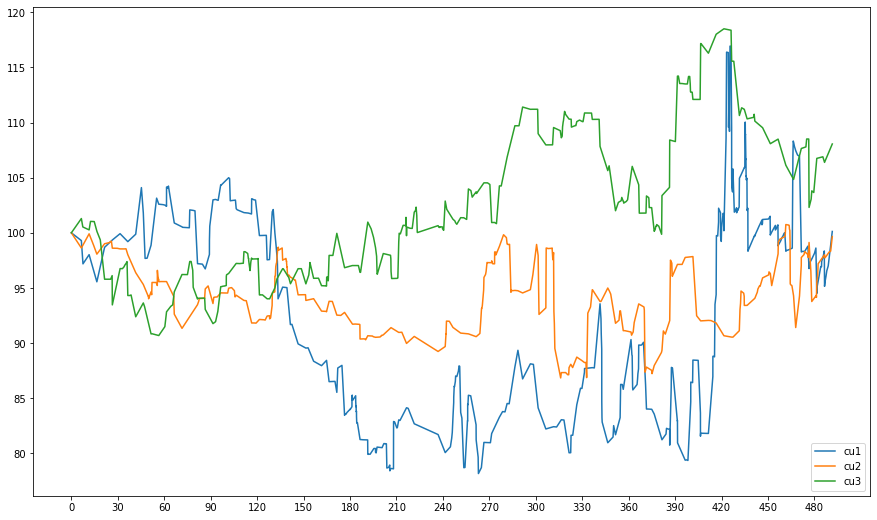

In [8]:
def plot_cu(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    cu_opers = opers[opers['currency'] == cu]
    cu_times = [0]+list(opers[opers['currency'] == cu]['time'].iloc[:-1])
    cu_prices = [100*p/init_p[cu] for p in cu_opers['price_before']]
    plt.plot(cu_times, cu_prices, label=cu)
    k = cu_times[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])
    plt.legend(loc='lower right')

plt.figure(figsize=(15, 9))
plot_cu('cu1')
plot_cu('cu2')
plot_cu('cu3')
plt.show

Построим то же самое, но только собственное поведение валюты - без влияния операций игроков.

<function matplotlib.pyplot.show(close=None, block=None)>

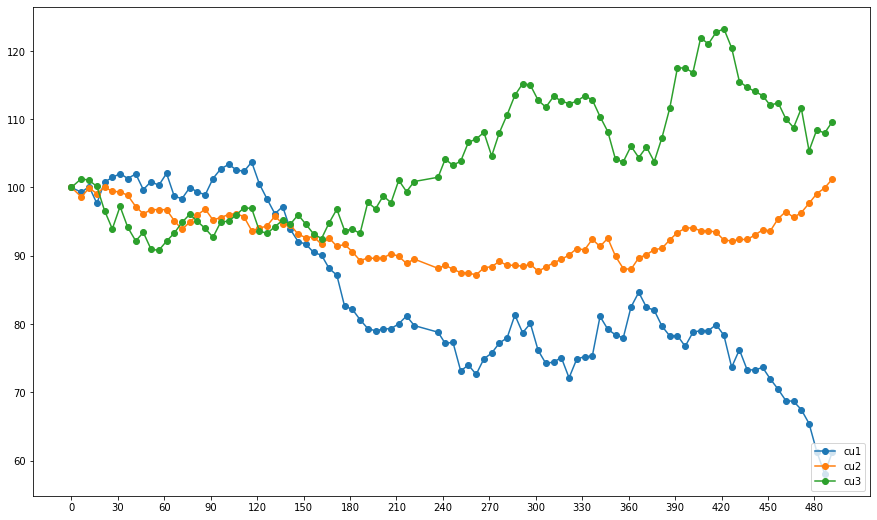

In [10]:
def plot_cu_upd(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    opers_u = opers[(opers['oper_type'] == 'update') | (opers['oper_type'] == 'final')]
    cu_opers = opers_u[opers_u['currency'] == cu]
    cu_times = [0]+list(opers_u[opers_u['currency'] == cu]['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
    cu_prices = [100*p/init_p[cu] for p in cu_prices]
    plt.plot(cu_times, cu_prices, label=cu, marker='o')
    k = cu_times[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])
    plt.legend(loc='lower right')
    #print(cu_opers.shape)

plt.figure(figsize=(15, 9))
plot_cu_upd('cu1')
plot_cu_upd('cu2')
plot_cu_upd('cu3')
plt.show

И наоборот - изменения, вызванные только влиянием операций игроков.

<ipython-input-15-d672e702950f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  opers_u = opers_u[opers['player_id'] != 20]
<ipython-input-15-d672e702950f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  opers_u = opers_u[opers['player_id'] != 20]
<ipython-input-15-d672e702950f>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  opers_u = opers_u[opers['player_id'] != 20]


<function matplotlib.pyplot.show(close=None, block=None)>

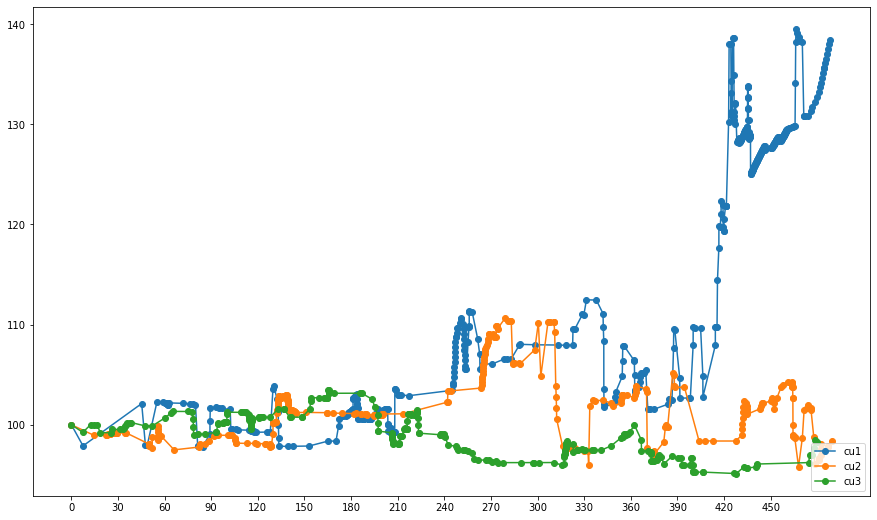

In [15]:
def plot_cu_bs(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    opers_u = opers[(opers['oper_type'] == 'sell') | (opers['oper_type'] == 'buy')]
    opers_u = opers_u[opers['player_id'] != 20]
#    opers_u = opers_u[opers['is_participate'] == 1]
    cu_opers = opers_u[opers_u['currency'] == cu]
    cu_times = [0]+list(opers_u[opers_u['currency'] == cu]['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
    cu_prices = [100*p/init_p[cu] for p in cu_prices]
    plt.plot(cu_times, cu_prices, label=cu, marker='o')
    k = cu_times[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])
    plt.legend(loc='lower right')
    #print(cu_times[-1])

plt.figure(figsize=(15, 9))
plot_cu_bs('cu1')
plot_cu_bs('cu2')
plot_cu_bs('cu3')
plt.show

Отдельно рассмотрим действия админа

<function matplotlib.pyplot.show(close=None, block=None)>

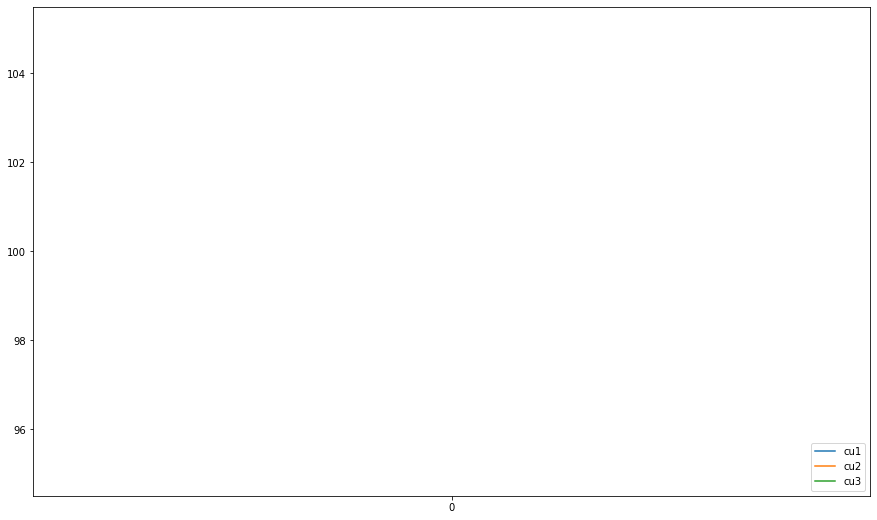

In [16]:
admin = pnd.shape[0]

def plot_cu_20(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    opers_u = opers[(opers['oper_type'] == 'sell') | (opers['oper_type'] == 'buy')]
    opers_u = opers_u[opers_u['player_id'] == admin]
    cu_opers = opers_u[opers_u['currency'] == cu]
    cu_times = [0]+list(opers_u[opers_u['currency'] == cu]['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
    cu_prices = [100*p/init_p[cu] for p in cu_prices]
    plt.plot(cu_times, cu_prices, label=cu)
    k = cu_times[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])
    plt.legend(loc='lower right')
#    print(cu_opers)

plt.figure(figsize=(15, 9))
plot_cu_20('cu1')
plot_cu_20('cu2')
plot_cu_20('cu3')
plt.show

In [17]:
opop = opers[(opers['player_id'] == admin) & ((opers['oper_type'] == 'buy') | (opers['oper_type'] == 'sell'))]
q = opop['amount']
p = opop['operation_price']
#opop[['time', 'amount', 'operation_price']]
purchases = [x*y for x, y in zip(q, p)]
len(purchases)

0

Построим на одном графике влияние обновлений+организатора и влияние игроков. Попробуем сразу отметить здесь новости.

In [18]:
def plot_cu_upd_bs(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    
    opers_u = opers[(opers['oper_type'] == 'update') | (opers['oper_type'] == 'final')]
    cu_opers = opers_u[opers_u['currency'] == cu]
    cu_times = [0]+list(opers_u[opers_u['currency'] == cu]['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
    cu_prices = cu_prices
#    plt.plot(cu_times, cu_prices, label=cu)
    k = cu_times[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])
    
    t_upd, p_upd = cu_times, cu_prices
    
    opers_bs = opers[(opers['oper_type'] == 'sell') | (opers['oper_type'] == 'buy')]
    opers_bs = opers_bs[opers_bs['player_id'] != 20]
    cu_opers = opers_bs[opers_bs['currency'] == cu]
    cu_times = [0]+list(cu_opers['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
    cu_prices = cu_prices
#    plt.plot(cu_times, cu_prices, label=cu)
    plt.legend(loc='lower right')
    
    t_bs, p_bs = cu_times, cu_prices
    
    cu_opers = opers[opers['currency'] == cu]
    t = [0]+list(opers[opers['currency'] == cu]['time'].iloc[:-1])
    p = cu_opers['price_before']
    
    return t_upd, p_upd, t_bs, p_bs, t, p
    
#plot_cu_upd_bs('cu1')

Обработаем новости вручную – выведем их, пометим, к какой валюте относятся, положительный прогноз содержат или отрицательный.

In [19]:
news = opers[opers['oper_type'] == 'news'][['time', 'info']]
list(news['info'])

['>>>    Эксперты предсказывают падение курса cu2 относительно доллара.',
 '>>>    Эксперты ожидают, что в ближайшие сроки cu3 подорожает относительно доллара.',
 '>>>    Эксперты предсказывают падение курса cu1 относительно доллара.',
 '>>>    Трейдеры массово покупают cu2, ожидая сильного роста цены.',
 '>>>    Эксперты ожидают, что в ближайшие сроки cu1 подешевеет по отношению к доллару.',
 '>>>    Эксперты предсказывают рост курса cu2 по отношению к доллару.',
 '>>>    Эксперты ожидают, что в ближайшие сроки cu3 подорожает относительно доллара.',
 '>>>    Эксперты предсказывают падение курса cu2 относительно доллара.',
 '>>>    Трейдеры массово покупают cu1, ожидая сильного роста цены.',
 '>>>    Эксперты предсказывают падение курса cu2 относительно доллара.',
 '>>>    Трейдеры массово покупают cu1, ожидая сильного роста цены.',
 '>>>    Эксперты предсказывают рост курса cu1 по отношению к доллару.']

In [22]:
currencies = ['cu2', 'cu3', 'cu1', 'cu2', 'cu1', 'cu2', 'cu3', 'cu2', 'cu1', 'cu2', 'cu1', 'cu1']
trends = ['-', '+', '-', '+', '-', '+', '+', '-', '+', '-', '+', '+']
news['currency'] = currencies
news['trend'] = trends
news = news[['currency', 'trend', 'time', 'info']]
news

,currency,trend,time,info
61,cu2,-,46.4778,>>> Эксперты предсказывают падение курса cu...
125,cu3,+,81.4755,">>> Эксперты ожидают, что в ближайшие сроки..."
471,cu1,-,201.496,>>> Эксперты предсказывают падение курса cu...
631,cu2,+,261.505,">>> Трейдеры массово покупают cu2, ожидая с..."
655,cu1,-,266.506,">>> Эксперты ожидают, что в ближайшие сроки..."
670,cu2,+,271.516,>>> Эксперты предсказывают рост курса cu2 п...
734,cu3,+,311.506,">>> Эксперты ожидают, что в ближайшие сроки..."
779,cu2,-,326.506,>>> Эксперты предсказывают падение курса cu...
815,cu1,+,346.528,">>> Трейдеры массово покупают cu1, ожидая с..."
916,cu2,-,386.538,>>> Эксперты предсказывают падение курса cu...


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


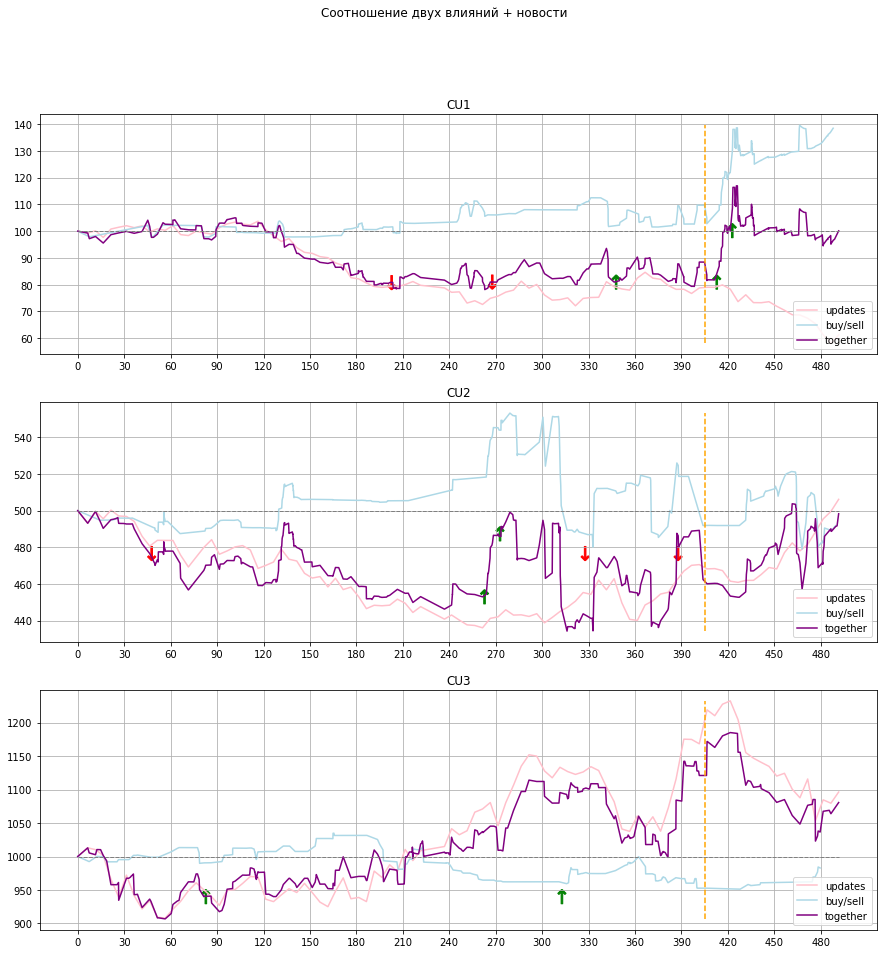

In [23]:
cu_list = ['cu1', 'cu2', 'cu3']
init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}

fig, axs = plt.subplots(3,1, figsize=(15,15))
fig.suptitle('Соотношение двух влияний + новости')
axs[0].set_title('CU1')
axs[1].set_title('CU2')
axs[2].set_title('CU3')

for i, cu in enumerate(cu_list):
    t_upd, p_upd, t_bs, p_bs, t, p = plot_cu_upd_bs(cu)
    axs[i].plot(t_upd, p_upd, label='updates', color='pink')
    axs[i].plot(t_bs, p_bs, label='buy/sell', color='lightblue')
    axs[i].plot(t, p, label='together', color='purple')
    axs[i].plot([0, t_upd[-1]], [p_upd[0], p_upd[0]], linestyle='--', color='grey', linewidth = 1)
       
        
    opers_cu = opers[(opers['currency'] == cu) | (opers['oper_type'] == 'news')]
    news_cu_up = news[(news['currency'] == cu) & (news['trend'] == '+')]
    news_times_up = news_cu_up['time']
    news_values_up = [opers_cu.iloc[np.where(opers_cu['info'] == row['info'])[0][0] + 1]['price_before'] for \
                      i, row in news_cu_up.iterrows()]
    news_cu_down = news[(news['currency'] == cu) & (news['trend'] == '-')]
    news_times_down = news_cu_down['time']
    news_values_down = [opers_cu.iloc[np.where(opers_cu['info'] == row['info'])[0][0] + 1]['price_before'] for \
                      i, row in news_cu_down.iterrows()]
    axs[i].scatter(news_times_up, news_values_up, np.ones(len(news_times_up))*200, color='green', marker=r'$\uparrow$')
    axs[i].scatter(news_times_down, news_values_down, np.ones(len(news_times_down))*200, color='red', marker=r'$\downarrow$')   
    
    manip = pnd['subsession.manip_update'].iloc[0] * 5
    top = max(max(p_upd), max(p_bs), max(p))
    bottom = min(min(p_upd), min(p_bs), min(p))
    axs[i].plot([manip, manip], [bottom, top], color='orange', linestyle='--', linewidth = 1.5)
    
    ticks = np.arange(0, t_upd[-1]+1, 30)
    axs[i].set_xticks(ticks)
    axs[i].grid()
    axs[i].legend(loc='lower right')
    k = t_upd[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])

Построим график частоты сделок во времени и посмотрим, как его поведение связано с новостями.

По оси Оy будем откладывать кол-во операций покупки/продажи за последние 3, 5, 10 секунд.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


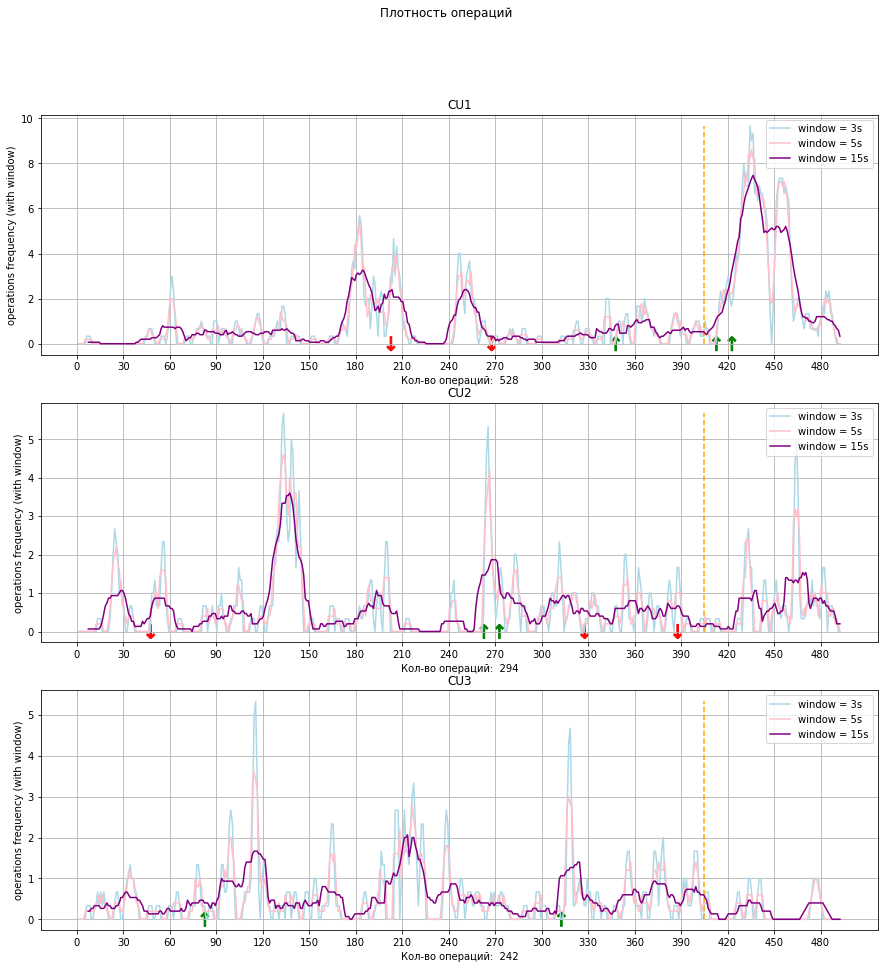

In [30]:
def in_borders(l, b1, b2):
    q = 0
    for item in sorted(l):
        if (item > b1) & (item <= b2):
            q += 1
    return q

cu_list = ['cu1', 'cu2', 'cu3']
init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}

fig, axs = plt.subplots(3,1, figsize=(15,15))
fig.suptitle('Плотность операций')
axs[0].set_title('CU1')
axs[1].set_title('CU2')
axs[2].set_title('CU3')

for i, cu in enumerate(cu_list):
    t_upd, p_upd, t_bs, p_bs, t, p = plot_cu_upd_bs(cu)
    x_list = np.arange(1.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_bs, x-1.5, x+1.5)/3 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 3s', color='lightblue')
    
    manip = pnd['subsession.manip_update'].iloc[0] * 5
    top = max(freq_oper)
    bottom = min(freq_oper)
    axs[i].plot([manip, manip], [bottom, top], color='orange', linestyle='--', linewidth = 1.5)
    
    x_list = np.arange(2.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_bs, x-2.5, x+2.5)/5 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 5s', color='pink')
    
    x_list = np.arange(7.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_bs, x-7.5, x+7.5)/15 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 15s', color='purple')
        
    news_cu_up = news[(news['currency'] == cu) & (news['trend'] == '+')]
    news_times_up = news_cu_up['time']
    news_cu_down = news[(news['currency'] == cu) & (news['trend'] == '-')]
    news_times_down = news_cu_down['time']
    axs[i].scatter(news_times_up, np.zeros(len(news_times_up)), np.ones(len(news_times_up))*200, color='green', marker=r'$\uparrow$')
    axs[i].scatter(news_times_down, np.zeros(len(news_times_down)), np.ones(len(news_times_down))*200, color='red', marker=r'$\downarrow$')   
    
    ticks = np.arange(0, t_upd[-1]+1, 30)
    axs[i].set_xticks(ticks)
    axs[i].set_ylabel('operations frequency (with window)')
    axs[i].set_xlabel(f'Кол-во операций:  {len(t_bs) - 1}\n')
    axs[i].grid()
    axs[i].legend(loc='upper right')
    k = t_upd[-1] // 30 + 1
    plt.xticks(30*np.arange(k), [round(x) for x in 30*np.arange(k)])

Здесь то же самое, только в положительную сторону откладываются частоты операций по покупке валюты, а в отрицательную – по продаже.

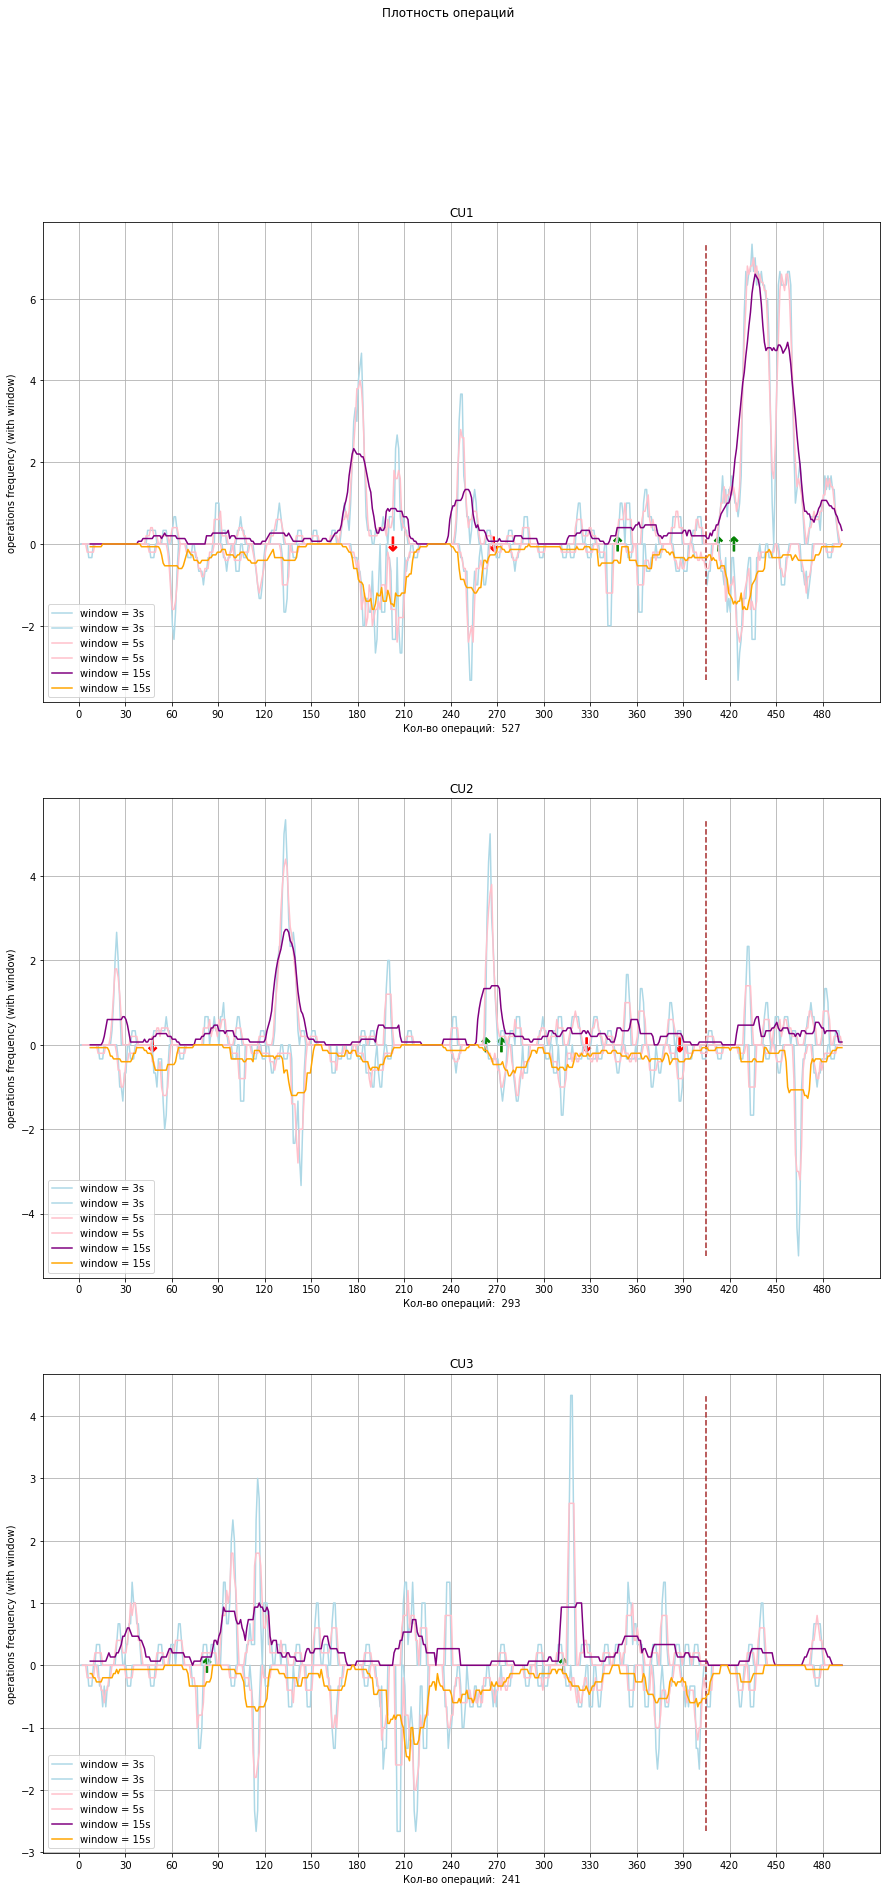

In [31]:
def cu_bs(cu):
    init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}
    
    opers_u = opers[(opers['oper_type'] == 'update') | (opers['oper_type'] == 'final')]
    cu_times = list(opers_u[opers_u['currency'] == cu]['time'].iloc[:-1])
    t_upd = cu_times
    
    opers_b = opers[opers['oper_type'] == 'buy']
    opers_b = opers_b[opers_b['player_id'] != 20]
    cu_opers = opers_b[opers_b['currency'] == cu]
    cu_times = list(cu_opers['time'].iloc[:-1])
    tb = cu_times
    
    opers_s = opers[opers['oper_type'] == 'sell']
    opers_s = opers_s[opers_s['player_id'] != 20]
    cu_opers = opers_s[opers_s['currency'] == cu]
    cu_times = list(cu_opers['time'].iloc[:-1])
    ts = cu_times

    return tb, ts, t_upd


cu_list = ['cu1', 'cu2', 'cu3']
init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}

fig, axs = plt.subplots(3,1, figsize=(15,30))
fig.suptitle('Плотность операций')
axs[0].set_title('CU1')
axs[1].set_title('CU2')
axs[2].set_title('CU3')

for i, cu in enumerate(cu_list):
    t_b, t_s, t_upd = cu_bs(cu)
    
    x_list = np.arange(1.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_b, x-1.5, x+1.5)/3 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 3s', color='lightblue')
    top = max(freq_oper)
    
    x_list = np.arange(1.5, round(t_upd[-1])+1)
    freq_oper = [-in_borders(t_s, x-1.5, x+1.5)/3 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 3s', color='lightblue')
    bottom = min(freq_oper)
    
    manip = pnd['subsession.manip_update'].iloc[0] * 5
    axs[i].plot([manip, manip], [bottom, top], color='brown', linestyle='--', linewidth = 1.5)
    
    x_list = np.arange(2.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_b, x-2.5, x+2.5)/5 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 5s', color='pink')
    
    x_list = np.arange(2.5, round(t_upd[-1])+1)
    freq_oper = [-in_borders(t_s, x-2.5, x+2.5)/5 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 5s', color='pink')
    
    x_list = np.arange(7.5, round(t_upd[-1])+1)
    freq_oper = [in_borders(t_b, x-7.5, x+7.5)/15 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 15s', color='purple')
    
    x_list = np.arange(7.5, round(t_upd[-1])+1)
    freq_oper = [-in_borders(t_s, x-7.5, x+7.5)/15 for x in x_list]
    axs[i].plot(x_list, freq_oper, label='window = 15s', color='orange')
        
    news_cu_up = news[(news['currency'] == cu) & (news['trend'] == '+')]
    news_times_up = news_cu_up['time']
    news_cu_down = news[(news['currency'] == cu) & (news['trend'] == '-')]
    news_times_down = news_cu_down['time']
    axs[i].scatter(news_times_up, np.zeros(len(news_times_up)), np.ones(len(news_times_up))*200, color='green', marker=r'$\uparrow$')
    axs[i].scatter(news_times_down, np.zeros(len(news_times_down)), np.ones(len(news_times_down))*200, color='red', marker=r'$\downarrow$')   
    
    ticks = np.arange(0, t_upd[-1]+1, 30)
    axs[i].set_xticks(ticks)
    axs[i].set_ylabel('operations frequency (with window)')
    axs[i].set_xlabel(f'Кол-во операций:  {len(t_b) + len(t_s)}\n')
    axs[i].grid()
    axs[i].legend(loc='lower left')

Сделаем нужные выводы по полученным графикам.

Теперь изобразим график операций игроков по валютам в двух цветах - участвующие/не участвующие. Также, рассмотрим поближе участок времени, на котором проводилась манипуляция.

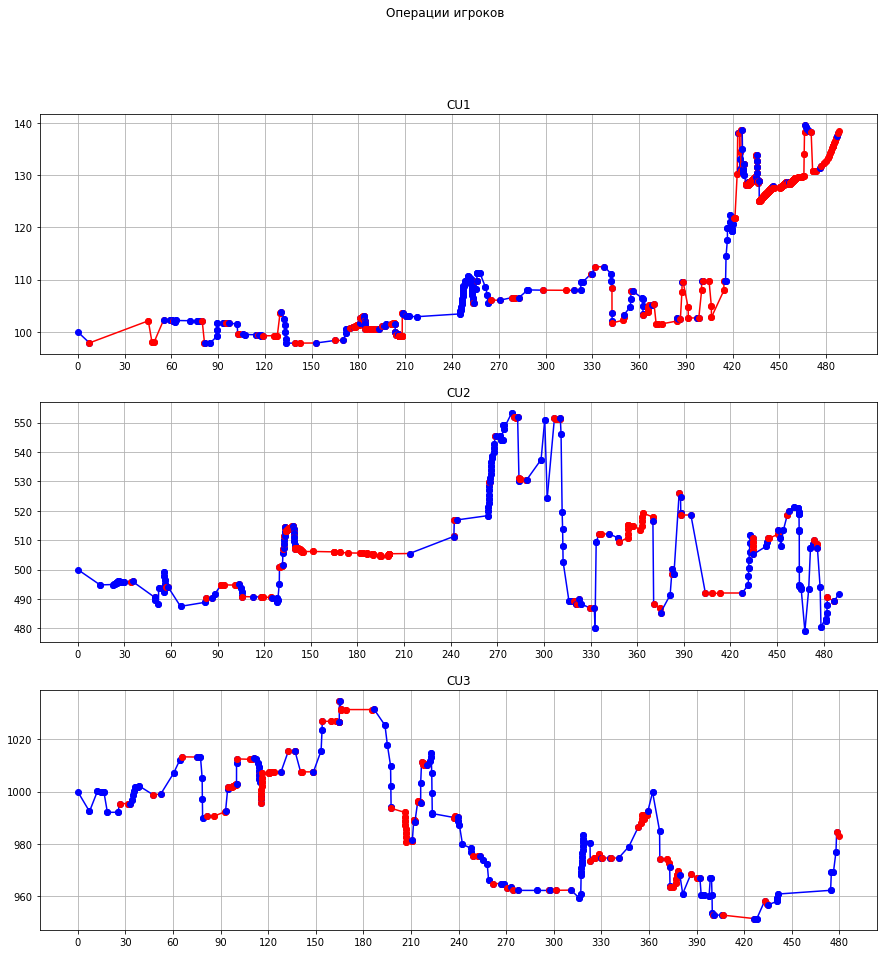

In [32]:
init_p = {'cu1': 100, 'cu2': 500, 'cu3': 1000}

fig, axs = plt.subplots(3,1, figsize=(15,15))
fig.suptitle('Операции игроков')
axs[0].set_title('CU1')
axs[1].set_title('CU2')
axs[2].set_title('CU3')

for k, cu in enumerate(init_p):
    opers_bs = opers[(opers['oper_type'] == 'buy') | (opers['oper_type'] == 'sell')]
    cu_opers = opers_bs[opers_bs['currency'] == cu]
    cu_times = [0]+list(cu_opers['time'].iloc[:-1])
    p = init_p[cu]
    cu_prices = [p]
    for move in list(cu_opers['price_move'].iloc[:-1]):
        p += move
        cu_prices.append(p)
        
    for i in np.arange(1, len(cu_times)):
        t0 = cu_times[i-1]
        t1 = cu_times[i]
        p0 = cu_prices[i-1]
        p1 = cu_prices[i]
        if cu_opers.iloc[i-1]['is_participate'] == 0:
            axs[k].plot([t0, t1], [p0, p1], color='blue', marker='o')
        if cu_opers.iloc[i-1]['is_participate'] == 1:
            axs[k].plot([t0, t1], [p0, p1], color='red', marker='o')
                              
    ticks = np.arange(0, t_upd[-1]+1, 30)
    axs[k].set_xticks(ticks)
    axs[k].grid()

Теперь мы имеем визуальное представление действий игроков того и другого вида. Наиболее интересующим участком данных здесь является период осуществления манипуляции с валютой.

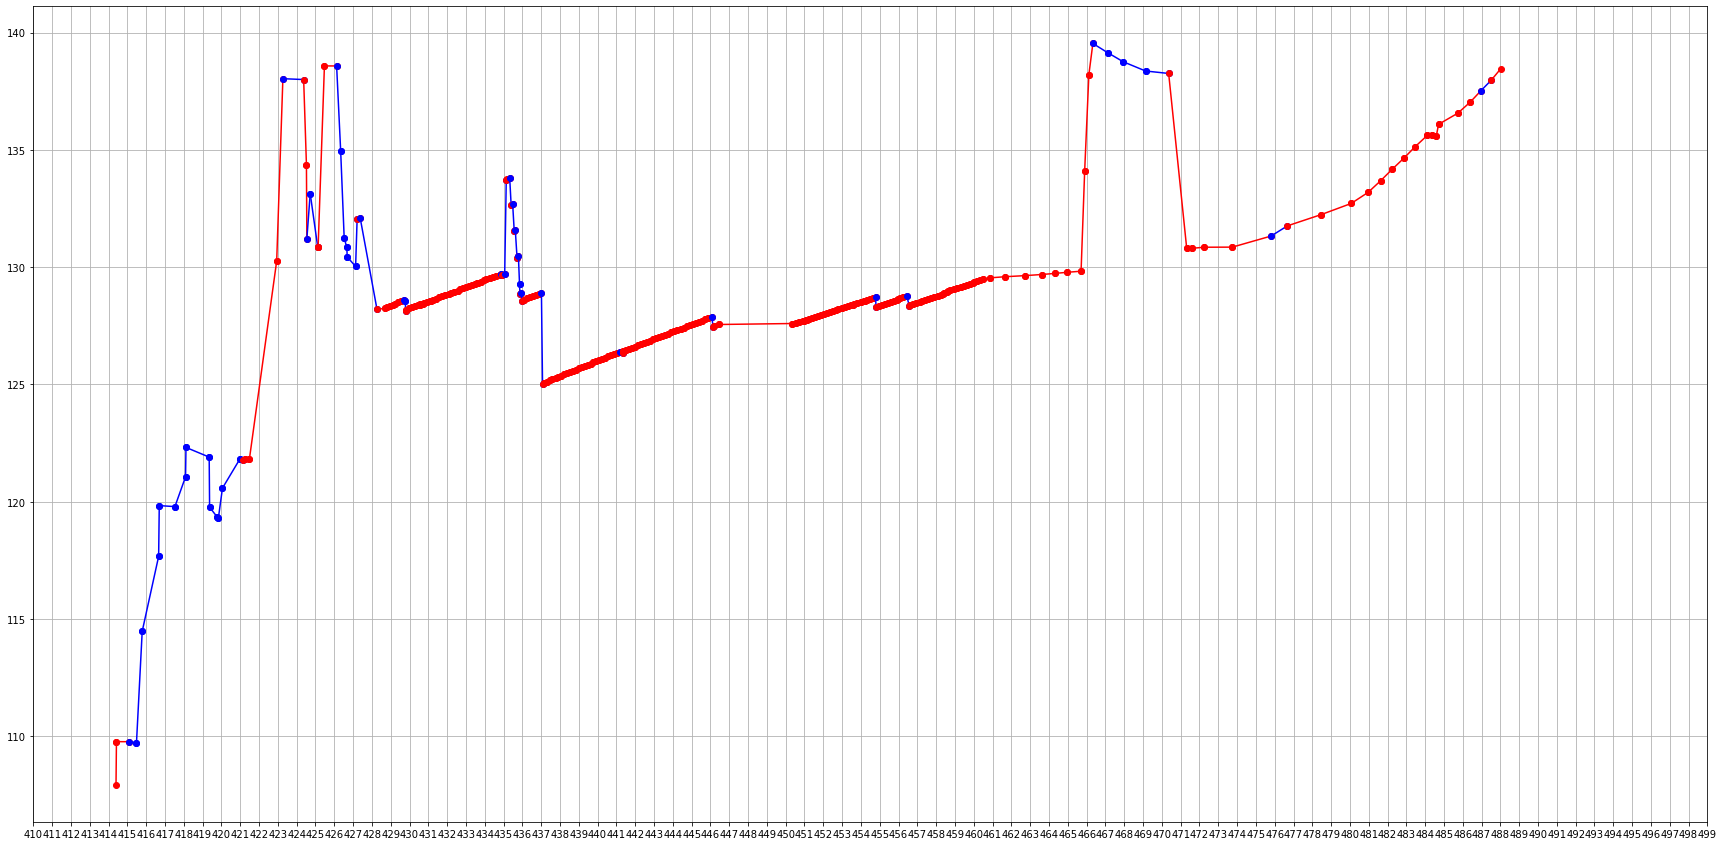

In [35]:
bounds = [410, 500]
bounds[0]
bounds[1]

cu = 'cu1'

plt.figure(figsize=(30, 15))
opers_bs = opers[(opers['oper_type'] == 'buy') | (opers['oper_type'] == 'sell')]
cu_opers = opers_bs[opers_bs['currency'] == cu]
p = init_p[cu]
for i, row in cu_opers.iloc[:np.where((cu_opers['time'] >= bounds[0]) & (cu_opers['time'] <= bounds[1]))[0][0]].iterrows():
    p += row['price_move']

cu_opers = cu_opers.iloc[np.where((cu_opers['time'] >= bounds[0]) & (cu_opers['time'] <= bounds[1]))[0]]
cu_times = list(cu_opers['time'].iloc[:-1])
cu_prices = []
for move in list(cu_opers['price_move'].iloc[:-1]):
    p += move
    cu_prices.append(p)
    
for i in np.arange(1, len(cu_times)):
    t0 = cu_times[i-1]
    t1 = cu_times[i]
    p0 = cu_prices[i-1]
    p1 = cu_prices[i]
    if cu_opers.iloc[i]['is_participate'] == 0:
        plt.plot([t0, t1], [p0, p1], color='blue', marker='o')
    if cu_opers.iloc[i]['is_participate'] == 1:
        plt.plot([t0, t1], [p0, p1], color='red', marker='o')
                          
ticks = np.arange(bounds[0], bounds[1], 1)
plt.xticks(ticks)
plt.grid()